# Data visualization notebook example

## Introduction
This notebook is aimed to present how the user can:
- load the data captured during data acqusition
- visualize the data

In this example the data is loaded from an external files (pickles). These datasets were captured using swe_seq_rec.py

### Load the required libraries
Code below loads the required Python packages.

In [1]:
import scipy.io
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pickle
from SWE_utils_cupy_pipelined2 import *


### Load the datasets from external files
There are three types of data loaded here: raw RF data, beamformed data and shear wave motion data. Latter two were reconstructed from the RF data during script execuition that also performed data acquisition.

In [2]:
# Load RF data
datafile = "datasets/data_id_4"
dataset = pickle.load(open(datafile+"rf.pkl", "rb"))
metadata = dataset["metadata"]
rf = dataset["data"]
print(rf.shape)
# Data organization: [1, frames, samples, channels].

(1, 80, 5120, 192)


In [3]:
# Load beamformed data
dataset = pickle.load(open(datafile+"bf.pkl", "rb"))
bf = dataset["data"]
print(bf.shape)
# Data organization: [frames, x, z].

(79, 250, 250)


In [4]:
# Load swd data
dataset = pickle.load(open(datafile+"swd.pkl", "rb"))
swd = dataset["data"]
print(swd.shape)
# Data organization: [x, z, frame].

(249, 250, 78)


### Visualization of data

#### RF data
One can simply draw a single RF line by extracting proper signal from the data. Singnle RF line can be used to adjust TGC settings.

Text(0.5, 0, 'Sample')

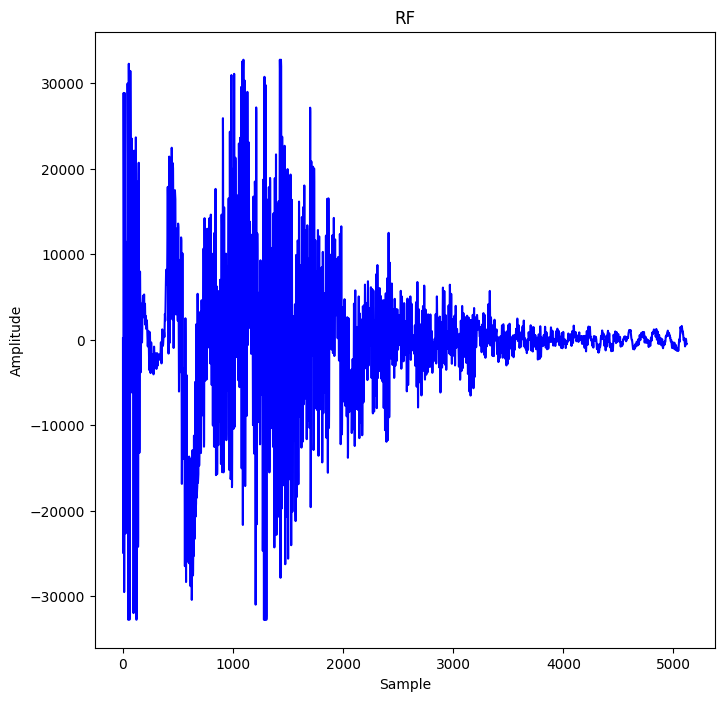

In [5]:
# Plotting the single RF line from a single channel and single frame
rfline = np.squeeze(rf[0, 50, :, 64])

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

axs.plot(rfline, 'blue')
axs.set_title('RF')
axs.set_ylabel('Amplitude')
axs.set_xlabel('Sample')

#### Data after beamforming
To verify the beamforming process, the B-mode images are obtained below. To do this, the envelope is detected out of I/Q data and the log compression is performed.

Text(0.5, 1.0, 'Bmode [dB]')

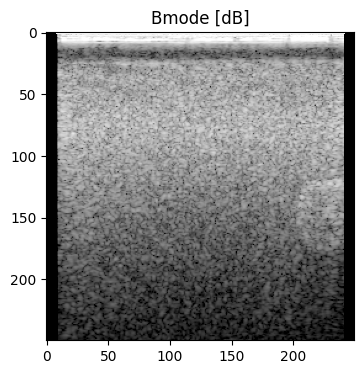

In [6]:
# Select the frame to draw
frame = 10

# Extract the frame from the data
bmf_frame = bf[frame, :, :]

# Envelope detection
data = np.abs(bmf_frame)

# Log compression
data[data==0] = 10**-10
data = 20 * np.log10(data)

data_dim = data.shape
if(data_dim[1] >= data_dim[0] ):
    data = np.transpose(data, [1,0])

# Visualize the image
dB_range = [20, 84] 
norm = plt.Normalize(dB_range[0], dB_range[1], True)
fig, ax0 = plt.subplots(1, 1, figsize=(8, 4))

ax0.imshow(data, cmap='gray', norm=norm)
ax0.set_title('Bmode [dB]')

#### Shear wave motion data

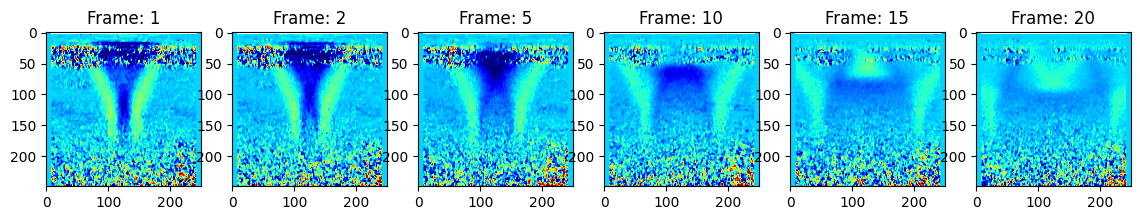

In [7]:
# Print SWD data from script
Vrange = [-2e-3, 4e-3]
Vrange2 = [-0.25e-3, 0.5e-3]
DrawShearWaveFrames(data=swd,       Vrange=Vrange, frames=[1, 2, 5, 10, 15, 20])